In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
from myFunctions.patches import *
from myFunctions.reconstruct import *
import os
import glob
import matplotlib.pyplot as plt
import keras
import tifffile

In [3]:
model = keras.models.load_model('Xception-NoInput-11April.keras')

# Any thing sized Yx30 is a problem.

In [4]:
# Example usage:
big_image_path = 'images/wall.jpg'
big_image = cv2.imread(big_image_path, cv2.IMREAD_GRAYSCALE)
patches = extract_flex_patches(big_image)

<Axes: ylabel='Frequency'>

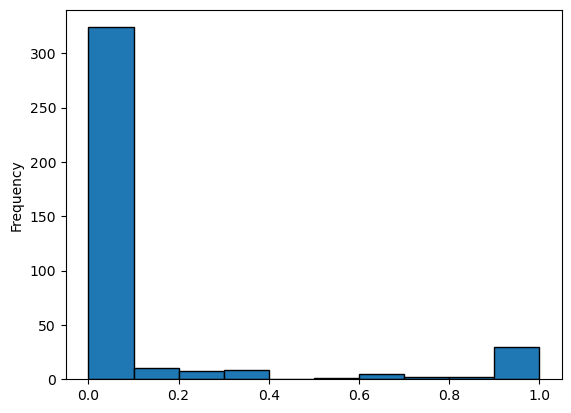

In [5]:
result_dataframe0 = predict_patches(patches, model)
result_dataframe0['Raw Label Prediction'].plot(kind='hist', edgecolor='black')

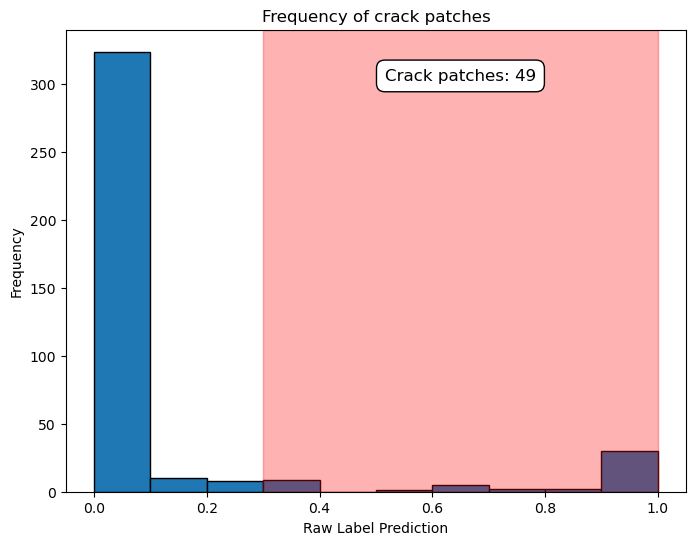

In [6]:
# Plot histogram with a shaded rectangle around crack patches
plot_histogram_with_threshold(result_dataframe0['Raw Label Prediction'], 0.3)

In [17]:
# Example usage:
big_image_path = 'images/wall.jpg'
big_image = cv2.imread(big_image_path)
patches = extract_flex_patches(big_image)

In [23]:
original_shape = big_image.shape

# Call the function with the numeric 'frame_thickness'
reconstructed_image = reconstruct_image_with_frame(patches, original_shape,result_dataframe0 )

output_path = 'results/reconstructed_frame.jpg'

cv2.imwrite(output_path, reconstructed_image)

True

In [24]:
# Call the first function to add text to each patch
patches_with_text = patchesLabel(patches, result_dataframe0)

# Call the combined function to create an image with frames and text
reconstructed_image_with_text = marked_image(patches_with_text, original_shape, result_dataframe0)

# Save the reconstructed image with text
output_path = 'results/reconstructed_image_with_text.jpg'
cv2.imwrite(output_path, reconstructed_image_with_text)

True

In [25]:
# Call the first function to add text to each patch
patches_with_text = patchesLabel2(patches, result_dataframe0)

# Call the combined function to create an image with frames and text
reconstructed_image_with_label = marked_image(patches_with_text, original_shape, result_dataframe0)

# Save the reconstructed image with text
output_path = 'results/reconstructed_labeled_image.jpg'
cv2.imwrite(output_path, reconstructed_image_with_label)

True

In [ ]:
result_dataframe0['Raw Label Prediction'] = result_dataframe0['Raw Label Prediction'] *100
result_dataframe0['Raw Label Prediction'] = result_dataframe0['Raw Label Prediction'].apply(lambda x: '{:.2f}'.format(x))
result_dataframe0

# Aggio

In [ ]:
# Example usage:
big_image_path = 'try/ligrip/AggioX_2.jpg'
big_image = cv2.imread(big_image_path, cv2.IMREAD_GRAYSCALE)
patches = extract_flex_patches(big_image)

In [ ]:
# Create a folder to save the patches
output_folder = 'try/ligrip/patches_agg/'
os.makedirs(output_folder, exist_ok=True)

# Save the patches to the folder
for i, patch in enumerate(patches, start=1):
    patch_filename = os.path.join(output_folder, f's_{i}.jpg')
    cv2.imwrite(patch_filename, patch)

print(f'{len(patches)} patches saved to {output_folder}.')


In [ ]:
folder_path = 'try/ligrip/patches_agg/'
result_dataframe0 = predict_folder(folder_path, model)
result_dataframe0['Raw Label Prediction'].plot(kind='hist', edgecolor='black')

In [ ]:
original_shape = big_image.shape

# Call the function with the numeric 'frame_thickness'
LayeredImage = addLayers(patches, original_shape,result_dataframe0 )

output_path = 'try/ligrip/Sizes/layered_agg220.jpg'

cv2.imwrite(output_path, LayeredImage)

In [ ]:
# Exporting as tif
import tifffile
file_path = 'try/ligrip/Sizes/layered_agg220Tiff.tif'

# Save the image array as a TIFF file
tifffile.imwrite(file_path, LayeredImage)